In [84]:
import pandas as pd
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import re
import nltk

In [85]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='aromerony', api_key='fiXSf2viVHJtMEz1akU2')

In [86]:
df = pd.read_csv('../lululemonSelenium/men/lululemon_final.csv')
pd.options.display.max_colwidth = 100

In [87]:
df = df.drop(df.columns[0], axis=1)

# Category/Category Types Analysis

### How are ratings spread over category types?

In [90]:
catType = df_reviews.groupby('categoryType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop=True)
catType = catType.rename(columns={'categoryType':'Category Type', 'product':'Total Count'})
catType

,Category Type,Total Count
0,shorts,669
1,long sleeve,498
2,short sleeve,366
3,tank,73
4,water bottle,61
5,jogger,51
6,hat,39
7,tights,25
8,socks + underwear,22
9,jackets + coats,5


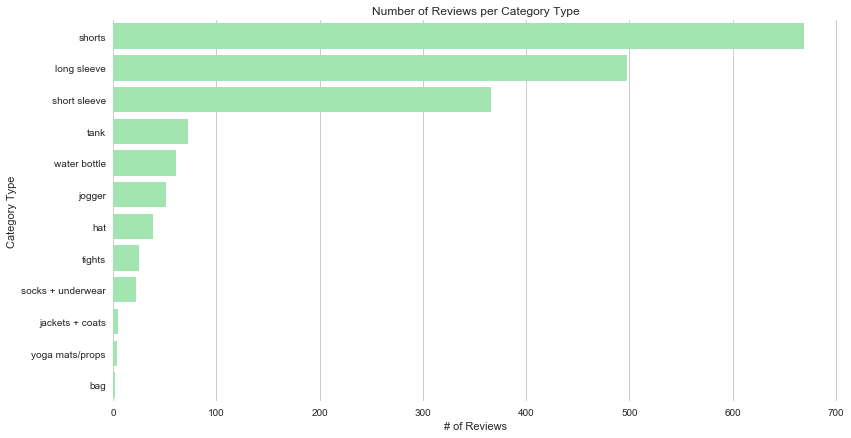

In [7]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Total Count', y='Category Type', data=catType, color="g")

# Add an informative axis label
ax.set(ylabel="Category Type", title='Number of Reviews per Category Type',
       xlabel="# of Reviews")
sns.despine(left=True, bottom=True)

## Category Types and Average Rating

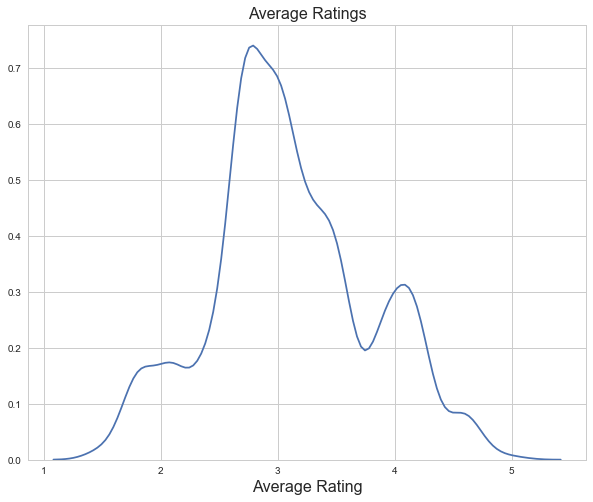

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df['average_rating'], hist = False)
plt.title("Average Ratings", fontsize=16)
plt.xlabel("Average Rating", fontsize=16)
plt.show();

## Number of Responses by User Rating

In [186]:
response_user_rating = df.groupby('user_rating')['response'].count().reset_index().sort_values('response', ascending = False).reset_index(drop=True)
response_user_rating = response_user_rating.rename(columns={'user_rating':'User Rating', 'response':'Total Responses'})
response_user_rating

,User Rating,Total Responses
0,1.0,357
1,2.0,224
2,3.0,108
3,4.0,47
4,5.0,8


# The most amount of responses come from ratings of 1-3

In [187]:
fives = df[df['user_rating'] == 5.0]
fives[~fives['response'].isnull()]

,product,list_price,average_rating,user_rating,user,location,athleticType,ageRange,bodyType,like,...,text,responseDate,response,helpfulYes,helpfulNo,date_Published,gender,category,categoryType,text length
286,"Pace Breaker Short Linerless 9"" Updated",68,4.1,5.0,HOCKEYPLAYER9,"PHILADELPHIA, PA, USA",SWEATY GENERALIST,18-24,ATHLETIC,"the liner, the materials",...,These shorts are fantastic!! I've been wearing the same five or six pairs to the gym and casuall...,2017-04-13,"Hey hockeyplayer9,\nThanks for taking the time to share your thoughts with us today. We love tha...",1,0,2017-04-13,male,bottom,shorts,667
306,Lightspeed Run Hat,38,4.3,5.0,KRF110,NaN,NaN,NaN,NaN,"the strap, simple design, properly fits your head",...,The hat is incredibly light and the strap is amazing. I own a black one with no design and its p...,2016-07-21,"Hey krf110,\nThanks for taking the time to share your feedback about your Light-speed Run Hat. W...",0,0,2016-07-21,male,accessory,hat,280
460,"Pace Breaker Short 9"" Updated",68,1.8,5.0,ANDY123,OTTAWA,CYCLIST,55-65,ATHLETIC,"style, tapered, liner",...,"I love this upgrade. The liner is very comfortable and supports well. However, I am not convince...",2018-07-21,"Hey BringBack,\n\nThank you for taking the time to share your feedback with us. It’s a bummer to...",3,0,2018-07-09,male,bottom,shorts,419
842,"Pace Breaker Short 9""",68,3.5,5.0,JEARBEAR,"KANSAS CITY, MO",SWEATY GENERALIST,35-44,ATHLETIC,great for crossfit and running,...,"I now have 3 pairs of pace breakers, having bought my 3rd pair last month. Having owned the firs...",2016-08-26,"Hey JearBear,\nThanks for taking the time to share your feedback about your Pace Breaker Short 9...",3,0,2016-08-26,male,bottom,shorts,464
1138,"Surge Short 7""",68,3.3,5.0,GENE,NaN,RUNNER,25-34,MUSCULAR,NaN,...,Absolutely the best running shorts around hands down. BUT i noticed mine are falling apart only ...,2015-01-17,"Hi Gene,\nThanks for reaching out. You shouldn't be experiencing this with your Surge Short 7"". ...",0,0,2015-01-17,male,bottom,shorts,264
1167,"Surge Short Light 7""",68,2.6,5.0,RUNEVERYDAY40,"FAYETTEVILLE, AR, USA",RUNNER,35-44,ATHLETIC,NaN,...,"I purchased 4 pairs of lulu shorts for my husband, and the surge short is his favorite pair. He ...",2016-06-06,"Hi Runeveryday40,\nThanks for taking the time to reach out and share your husbands experience wi...",2,0,2016-06-05,male,bottom,shorts,196
1228,"Pace Breaker Short 9"" Linerless",68,4.1,5.0,HOCKEYPLAYER9,"PHILADELPHIA, PA, USA",SWEATY GENERALIST,18-24,ATHLETIC,"the liner, the materials",...,These shorts are fantastic!! I've been wearing the same five or six pairs to the gym and casuall...,2017-04-13,"Hey hockeyplayer9,\nThanks for taking the time to share your thoughts with us today. We love tha...",1,0,2017-04-13,male,bottom,shorts,667
1260,"Pace Breaker Short 9"" Updated",68,1.8,5.0,ANDY123,OTTAWA,CYCLIST,55-65,ATHLETIC,"style, tapered, liner",...,"I love this upgrade. The liner is very comfortable and supports well. However, I am not convince...",2018-07-21,"Hey BringBack,\n\nThank you for taking the time to share your feedback with us. It’s a bummer to...",3,0,2018-07-09,male,bottom,shorts,419


# Are these 5's that get a response much different from the rest of the reviews?

In [95]:
ones_twos_threes = df[(df.user_rating == 1.0) | (df.user_rating == 2.0) | (df.user_rating == 3.0)]
ones_twos_threes[~ones_twos_threes['response'].isnull()]

,product,list_price,average_rating,user_rating,user,location,athleticType,ageRange,bodyType,like,...,text,responseDate,response,helpfulYes,helpfulNo,date_Published,gender,category,categoryType,text length
5,Metal Vent Tech Short Sleeve,68,2.7,1.0,JKIM,"BOSTON, MA, USA",SWEATY GENERALIST,18-24,ATHLETIC,NaN,...,"The metal vent tech short sleeve was a perfect fit for me when I first got it, but it shrunk alm...",2018-08-06,"Hey Jkim,\n\nThanks for taking the time to share your feedback with us. I'm sorry to hear your M...",0,0,2018-08-05,male,top,short sleeve,216
7,Metal Vent Tech Short Sleeve,68,2.7,2.0,SOLECATALYST,NaN,NaN,NaN,NaN,NaN,...,I initially liked this shirt as it is very comfortable and fits extremely well. It's fitted but ...,2018-08-04,"Hey SoleCatalyst,\n\nWe're sorry to read of your recent experience and would love to discuss thi...",0,0,2018-08-03,male,top,short sleeve,520
15,Metal Vent Tech Short Sleeve,68,2.7,2.0,RUN98,AUSTIN,RUNNER,18-24,ATHLETIC,"design, material",...,The material and design of the shirt are great and I've been using them for years. They move wit...,2018-07-31,"Dear run98,\n\nThanks for reaching out and providing this feedback for us. We stand behind the q...",0,0,2018-07-28,male,top,short sleeve,379
17,Metal Vent Tech Short Sleeve,68,2.7,2.0,CG22KU,ST. LOUIS,CYCLIST,18-24,LEAN,NaN,...,"I love Lululemon and wear it almost every day, however the red metal vent tech short sleeve has ...",2018-07-29,"Hi cg22ku,\n\nThank you for taking the time to share your feedback with us. We are sorry to hear...",0,0,2018-07-28,male,top,short sleeve,373
18,Metal Vent Tech Short Sleeve,68,2.7,2.0,KRNROO,NaN,NaN,NaN,NaN,NaN,...,after two washes the shirt has stretched out to the point where it's unwearable. lululemon pride...,2018-07-23,"Hi Krnroo,\nWe're sorry to read of your recent experience and would love to discuss this further...",0,0,2018-07-23,male,top,short sleeve,236
20,Metal Vent Tech Short Sleeve,68,2.7,2.0,ELCAPTAIN24,"NEW YORK, NY, USA",SWEATY GENERALIST,25-34,ATHLETIC,"feel, colors, soft",...,"I own a few of these shirts. I love the silverescent material and feel of the shirts, however on...",2018-07-13,"Hi ElCaptain24,\nThanks for taking the time to share this feedback. It's not good to hear that o...",0,0,2018-07-12,male,top,short sleeve,431
22,Metal Vent Tech Short Sleeve,68,2.7,2.0,WRINKLY,"CHICAGO, IL, USA",RUNNER,25-34,ATHLETIC,NaN,...,"I love lulu lemon. It is my main apparel for working out. That being said, I was extremely disap...",2018-07-05,"Hey Wrinkly,\n\nThanks for taking the time to pass along some feedback on the Metal Vent Tech Sh...",0,0,2018-07-04,male,top,short sleeve,411
23,Metal Vent Tech Short Sleeve,68,2.7,3.0,JMZATL,"ATLANTA, GA, USA",RUNNER,45-54,ATHLETIC,NaN,...,"I have several of the Metal Vent Tech tops, most are 2014 vintage, and I absolutely love them an...",2018-06-19,"Hey jmzatl,\n\nThank you for taking the time to share your feedback with us. We want your gear t...",0,0,2018-06-18,male,top,short sleeve,470
24,Metal Vent Tech Short Sleeve,68,2.7,1.0,THEBOMBA,"SPOKANE, WA",YOGI,45-54,NaN,colors,...,I have recently gotten into hot yoga and after struggling with regular gym shorts that go beyond...,2018-06-19,"Hey thebomba,\n\nThank you for taking the time to review the Metal Vent Tech Short Sleeve. We wa...",0,0,2018-06-18,male,top,short sleeve,600
26,Metal Vent Tech Short Sleeve,68,2.7,3.0,MDV11,"ATLANTA, GA, USA",SWEATY GENERALIST,25-34,ATHLETIC,NaN,...,I've owned 2 of these for roughly 1 year. Both have shriveled up around the neckline. Both have ...,2018-05-14,"Hi MDV11,\nThank you for taking the time to share your feedback with us. I'd love to help you ou...",0,0,2018-05-14,male,top,short sleeve,191


### Number of Ratings by Athletic Type

In [17]:
bodyType_prod = df.groupby('bodyType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop = True)
bodyType_prod

,bodyType,product
0,ATHLETIC,907
1,MUSCULAR,231
2,LEAN,163
3,SLIM,106
4,SOLID,64
5,PETITE,28
6,CURVY,20


### WHO ARE THESE CURVY MEN?!

In [18]:
df[df['bodyType'] == 'CURVY'].groupby('athleticType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop = True)
# Ew, sweaty generalist.

,athleticType,product
0,SWEATY GENERALIST,11
1,RUNNER,5
2,YOGI,3
3,DANCER,1


In [209]:
df[df['bodyType'] == 'CURVY']['product']

273     Pace Breaker Short Linerless 9" Updated
275     Pace Breaker Short Linerless 9" Updated
443               Pace Breaker Short 9" Updated
585                            Surge Jogger 29"
611           Purist Cycling Water Bottle 26 oz
615           Purist Cycling Water Bottle 26 oz
616           Purist Cycling Water Bottle 26 oz
617           Purist Cycling Water Bottle 26 oz
646           Purist Cycling Water Bottle 26 oz
653           Purist Cycling Water Bottle 26 oz
654           Purist Cycling Water Bottle 26 oz
658           Purist Cycling Water Bottle 26 oz
659           Purist Cycling Water Bottle 26 oz
682                    Surge Short Linerless 7"
925                    Metal Vent Tech Headband
1002         Metal Vent Tech Long Sleeve Henley
1176                      Pace Breaker Short 9"
1215            Pace Breaker Short 9" Linerless
1217            Pace Breaker Short 9" Linerless
1243              Pace Breaker Short 9" Updated
Name: product, dtype: object

In [32]:
df[df['bodyType'] == 'ATHLETIC'].groupby('athleticType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop = True)

,athleticType,product
0,SWEATY GENERALIST,501
1,RUNNER,274
2,YOGI,55
3,CYCLIST,22
4,DANCER,4


In [189]:
df[df['bodyType'] == 'ATHLETIC'].sample(10)

,product,list_price,average_rating,user_rating,user,location,athleticType,ageRange,bodyType,like,...,text,responseDate,response,helpfulYes,helpfulNo,date_Published,gender,category,categoryType,text length
1605,"Surge Short Linerless 7""",58,4.6,5.0,MPOLLZZIE,"MONROE, MI, USA",YOGI,25-34,ATHLETIC,NaN,...,"These are very comfortable when biking, hiking, shopping or lounging! All around great pair of s...",NaN,NaN,0,0,2018-07-31,male,bottom,shorts,102
1364,"T.H.E. Short 9"" Updated",68,2.8,4.0,THISISFUN,"GRANVILLE, OH, USA",SWEATY GENERALIST,45-54,ATHLETIC,"great liner, love the waistband, perfect length",...,"The reason I have an entire closet of Lululemon shorts, shirts and pants is due to the consisten...",NaN,NaN,1,0,2018-05-03,male,bottom,shorts,399
258,Surge Run Backpack II 16L,128,4.5,5.0,RUNNINGRMT,"VANCOUVER, BC, CANADA",RUNNER,35-44,ATHLETIC,"water bottle holders, size, fit, ergonomics, doesn't affect biomechanics too much.",...,Absolutely Amazing bag. I don't know how many 10k races I've done and watched people struggle wi...,NaN,NaN,23,1,2017-04-11,male,accessory,bag,420
73,Metal Vent Tech Short Sleeve,68,2.7,1.0,QUIQUE,MEXICO,SWEATY GENERALIST,25-34,ATHLETIC,NaN,...,Waste of money. Completely different construction from the older versions -- no change in patter...,NaN,NaN,1,4,2017-06-06,male,top,short sleeve,441
846,"Pace Breaker Short 9""",68,3.5,4.0,BOOSER,"CHICAGO, IL",SWEATY GENERALIST,45-54,ATHLETIC,full boxer brief,...,"I have about 8 pairs of these shorts. they are fantastic given they can be used for running, lif...",2016-07-26,"Hey there Booser,\nThanks for reaching out and letting us know your feedback. I'm sorry to hear ...",3,0,2016-07-26,male,bottom,shorts,502
944,"Surge Short Online Only 3""",68,4.1,3.0,SHORTSHORTSRULE,NaN,SWEATY GENERALIST,NaN,ATHLETIC,shorts,...,The length and fit of these shorts are amazing.....However the liner can't even handle a walk to...,2018-04-24,"Hi ShortShortsRule,\nThank you for taking the time to review the Surge Short. We're sorry to rea...",0,0,2018-04-23,male,bottom,shorts,477
1227,"Pace Breaker Short 9"" Linerless",68,4.1,3.0,CHIPPERJONES,"CHARLESTON, SC, USA",SWEATY GENERALIST,35-44,ATHLETIC,"style, quality",...,"I own numerous pairs of the Pace Breaker shorts and love them, but it's been several years since...",NaN,NaN,1,0,2017-05-03,male,bottom,shorts,235
875,Metal Vent Tech Hoodie,98,2.1,3.0,MISTERO,"SEATTLE, WA, USA",RUNNER,25-34,ATHLETIC,fabric,...,I usually wear XL shirts but I like wearing XXL Hoodies while working out. The XXL Metal Vent Ho...,NaN,NaN,0,0,2016-08-20,male,top,long sleeve,127
161,"T.H.E. Short 9"" Updated",68,2.8,4.0,THISISFUN,"GRANVILLE, OH, USA",SWEATY GENERALIST,45-54,ATHLETIC,"great liner, love the waistband, perfect length",...,"The reason I have an entire closet of Lululemon shorts, shirts and pants is due to the consisten...",NaN,NaN,1,0,2018-05-03,male,bottom,shorts,399
338,Metal Vent Tech 1/2 Zip,98,2.4,3.0,MPLSLULULOVER89,MINNEAPOLIS,RUNNER,25-34,ATHLETIC,NaN,...,"The color of this half zip is great. Unfortunately as other reviews read, the quality is simply ...",2017-03-28,"Hey MplsLuluLover89,\nYikes. I'm sorry to hear that your Metal Vent Tech 1/2 Zip arrived with a ...",7,0,2017-03-27,male,top,long sleeve,471


How are these different body types reviewing? What are they buying?

## How do the age ranges spread?

Text(0.5,0,'Age Range')

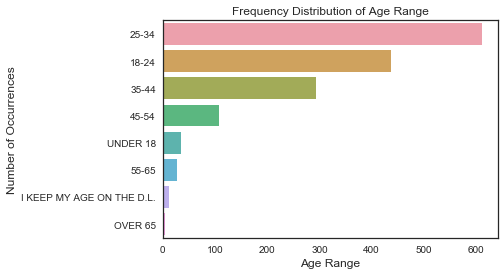

In [210]:
age_count = df['ageRange'].value_counts()
sns.set(style="white")
sns.set_color_codes("pastel")


sns.barplot(y = age_count.index, x = age_count.values, alpha=0.9)

plt.title('Frequency Distribution of Age Range')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age Range', fontsize=12)

## Spending Habits

In [34]:
ages = df.groupby(['ageRange'])['product'].count().reset_index().sort_values(['product'], ascending = False).reset_index(drop = True)
ages
# We've got some "DL" people

,ageRange,product
0,25-34,611
1,18-24,438
2,35-44,293
3,45-54,108
4,UNDER 18,35
5,55-65,28
6,I KEEP MY AGE ON THE D.L.,12
7,OVER 65,4


# Review Text Analysis

### Create a new data frame with empty reviews removed

In [97]:
df_reviews = df.dropna(subset=['text'])

In [129]:
df_reviews['text'].isnull().sum()

0

In [130]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

## How are users talking about the products?

In [207]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                          scale=3,
                          random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

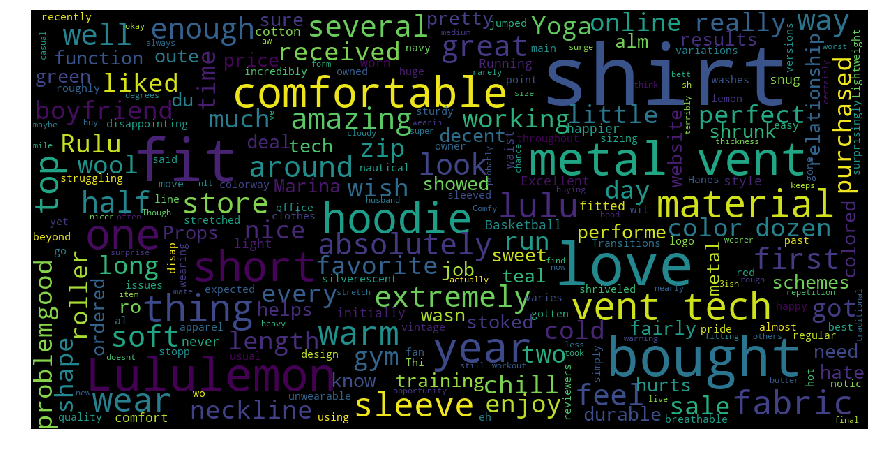

In [208]:
show_wordcloud(df_reviews['text'])

### What is the max number of ratings people gave?

In [135]:
cnt_srs = df['user_rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

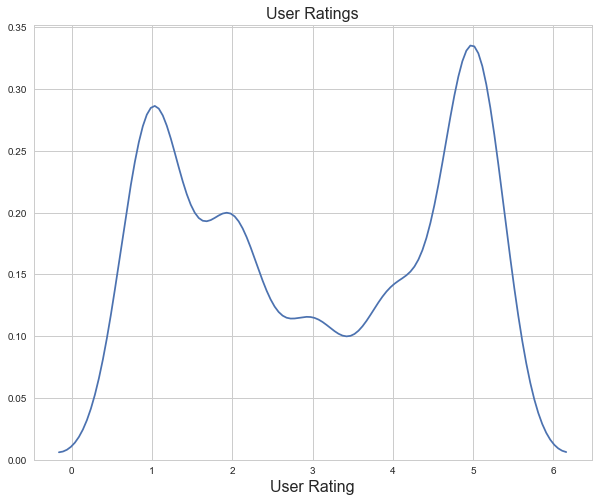

In [136]:
plt.figure(figsize=(10,8))
sns.distplot(df['user_rating'], hist = False)
plt.title("User Ratings", fontsize=16)
plt.xlabel("User Rating", fontsize=16)
plt.show();

### Does the length of a review tell anything about the ratings given?

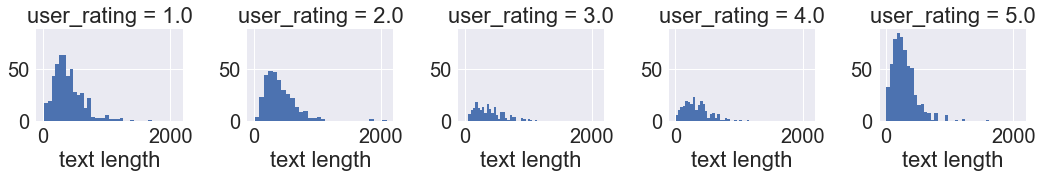

In [144]:
sns.set(font_scale=2.0)
g = sns.FacetGrid(data=df, col='user_rating')

g.map(plt.hist, 'text length', bins = 30)

Seems that ratings follow a similar distribution in review length.
There also seems to be a lower amount of 3 and 4 ratings
Mostly ratings of 5

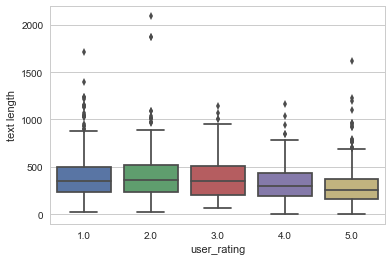

In [135]:
sns.boxplot(x='user_rating', y='text length', data=df)

## How are ratings spread through cateogry types?

In [181]:
df.groupby('product')['user_rating'].agg(['mean', 'count']).sort_values('mean', ascending = False).head(20)

,mean,count
product,,
Metal Vent Tech Kit,5.000000,1
"Pace Breaker Short Linerless 7""",5.000000,2
Double Roller,4.750000,4
Metal Vent Tech Headband,4.600000,25
Sweat Stride Short Sleeve,4.500000,2
Surge Run Backpack II 16L,4.500000,2
Lightspeed Run Hat,4.285714,14
"Surge Short Online Only 5""",4.215686,51
"Surge Short 4"" Updated",4.181818,22


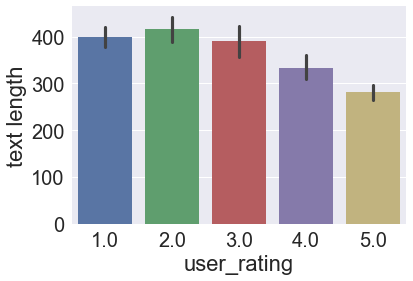

In [185]:
sns.barplot(x="user_rating", y="text length", data=df)


In [180]:
df.groupby('product')['user_rating'].agg(['mean', 'count']).sort_values('mean', ascending = False).tail(20)

,mean,count
product,,
Purist Cycling Water Bottle 26 oz,2.967213,61
"Pace Breaker Short 9""",2.878981,157
"Surge Jogger 29""",2.823529,51
"T.H.E. Short 9"" Updated",2.800000,40
"Surge Light 3/4 Tight Side Pockets 23""",2.800000,10
"Surge Short 6"" Updated",2.750000,40
Metal Vent Tech Short Sleeve,2.664062,256
"Surge Short Light 7""",2.631579,19
Surge Sock,2.600000,10


In [141]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

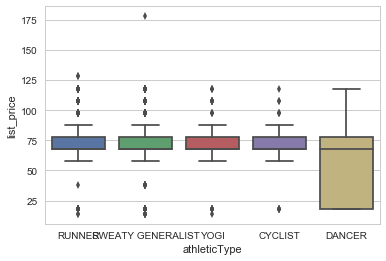

In [282]:
sns.boxplot(x="athleticType", y="list_price", data=df);


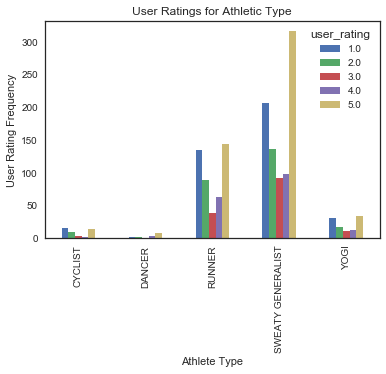

In [205]:
pd.crosstab(df.athleticType, df.user_rating).plot(kind='bar')
plt.title('User Ratings for Athletic Type')
plt.xlabel('Athlete Type')
plt.ylabel('User Rating Frequency')
plt.savefig('user_rating_fre_athType')

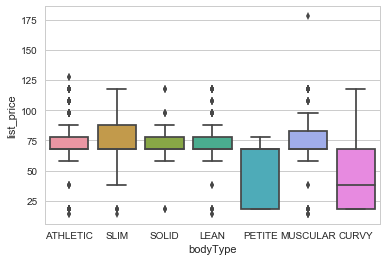

In [283]:
sns.boxplot(x="bodyType", y="list_price", data=df);


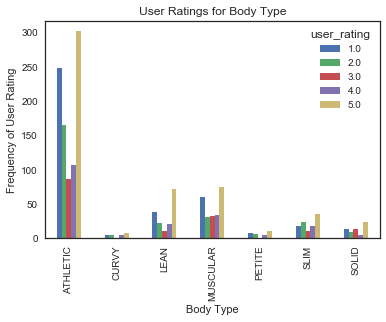

In [206]:

pd.crosstab(df.bodyType, df.user_rating).plot(kind='bar')
plt.title('User Ratings for Body Type')
plt.xlabel('Body Type')
plt.ylabel('Frequency of User Rating')
plt.savefig('user_rating_fre_bodyType')

Text(0.5,0,'Age Range')

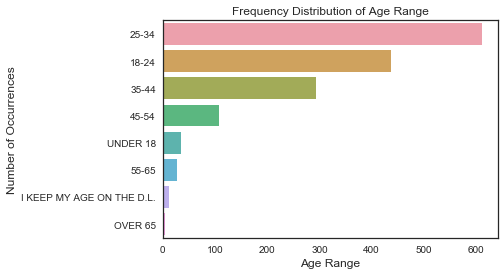

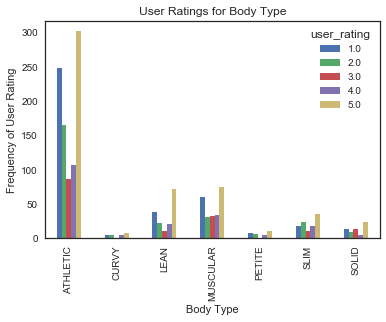

Text(0,0.5,'Proportion of Body Types')

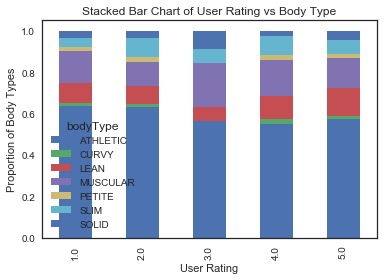

In [203]:
table=pd.crosstab(df.user_rating,df.bodyType)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of User Rating vs Body Type')
plt.xlabel('User Rating')
plt.ylabel('Proportion of Body Types')

# Does month/year make an impact on ratings?

In [214]:
df['datePublished'] = pd.to_datetime(df['datePublished'], infer_datetime_format=True)
df['responseDate'] = pd.to_datetime(df['responseDate'], infer_datetime_format=True)

In [216]:
df['year'], df['month'] = df['datePublished'].dt.year, df['datePublished'].dt.month

In [232]:
year_counts = df.groupby('year')['product'].count().reset_index()
year_counts = year_counts.rename(columns={'year':'Year', 'product':'Total Responses'})
year_counts

,Year,Total Responses
0,2010,3
1,2011,8
2,2012,21
3,2013,32
4,2014,93
5,2015,148
6,2016,306
7,2017,505
8,2018,699


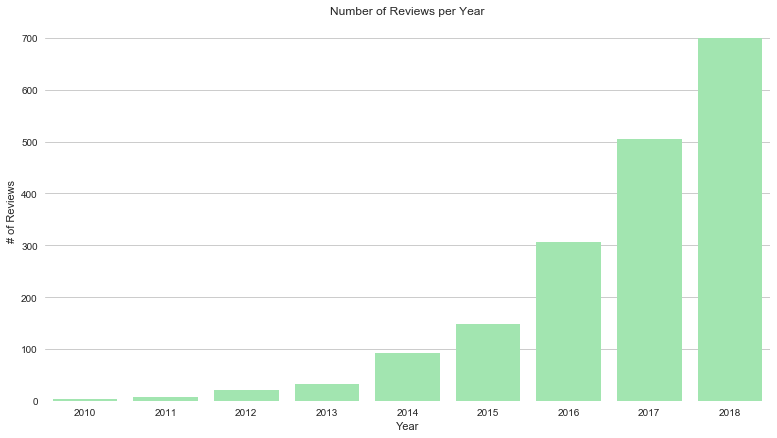

In [233]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Year', y='Total Responses', data=year_counts, color="g")

# Add an informative axis label
ax.set(ylabel="# of Reviews", title='Number of Reviews per Year',
       xlabel="Year")
sns.despine(left=True, bottom=True)

In [235]:
month_counts = df.groupby('month')['product'].count().reset_index()
month_counts = month_counts.rename(columns={'month':'Month', 'product':'Total Responses'})
month_counts

,Month,Total Responses
0,1,135
1,2,110
2,3,124
3,4,127
4,5,148
5,6,174
6,7,318
7,8,229
8,9,118
9,10,115


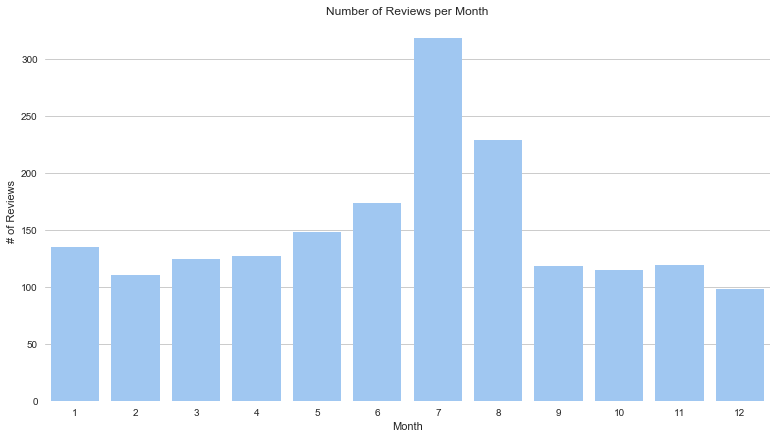

In [236]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Month', y='Total Responses', data=month_counts, color="b")

# Add an informative axis label
ax.set(ylabel="# of Reviews", title='Number of Reviews per Month',
       xlabel="Month")
sns.despine(left=True, bottom=True)

In [254]:
ratings_year = df.groupby(['year', 'user_rating'])['product'].count().reset_index()
ratings_year

,year,user_rating,product
0,2010,3.0,1
1,2010,5.0,2
2,2011,3.0,2
3,2011,4.0,2
4,2011,5.0,4
5,2012,1.0,2
6,2012,2.0,1
7,2012,4.0,1
8,2012,5.0,17
9,2013,1.0,1


In [255]:


data = [ratings_year['year'], ratings_year['user_rating']]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [0     2010
1     2010
2     2011
3     2011
4     2011
5     2012
6     2012
7     2012
8     2012
9     2013
10    2013
11    2013
12    2013
13    2013
14    2014
15    2014
16    2014
17    2014
18    2014
19    2015
20    2015
21    2015
22    2015
23    2015
24    2016
25    2016
26    2016
27    2016
28    2016
29    2017
30    2017
31    2017
32    2017
33    2017
34    2018
35    2018
36    2018
37    2018
38    2018
Name: year, dtype: int64, 0     3.0
1     5.0
2     3.0
3     4.0
4     5.0
5     1.0
6     2.0
7     4.0
8     5.0
9     1.0
10    2.0
11    3.0
12    4.0
13    5.0
14    1.0
15    2.0
16    3.0
17    4.0
18    5.0
19    1.0
20    2.0
21    3.0
22    4.0
23    5.0
24    1.0
25    2.0
26    3.0
27    4.0
28    5.0
29    1.0
30    2.0
31    3.0
32    4.0
33    5.0
34    1.0
35    2.0
36    3.0
37    4.0
38    5.0
Name: user_rating, dtype: float64]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'box', 'candlestick', 'carpet',
                     'choropleth', 'cone', 'contour',
                     'contourcarpet', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'mesh3d', 'ohlc',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'surface', 'table', 'violin']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])